# Part 7 -- Latent Semantic Analysis (SP500)

Vectorizing text data and Singular Value Decomposition (SVD)

**Load lib codes**

In [1]:
!pwd

/home/jovyan/work


In [7]:
!pip uninstall bson
!pip uninstall pymongo
!pip install pymongo

Cannot uninstall requirement bson, not installed
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Cannot uninstall requirement pymongo, not installed
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 368kB 1.6MB/s ta 0:00:01
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
from os import chdir
chdir('/home/jovyan/work')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymongo
import datetime as dt
from datetime import datetime


# from lib import *
# # suppress_warnings()

In [9]:
X = pd.read_pickle('4.2.X.pickle')

In [11]:
y_le = pd.read_pickle('5.2.y_le_SP500.pickle')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [13]:
tfidf_svd_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), min_df=20, stop_words='english')),
    ('svd', TruncatedSVD(n_components = 10, random_state=42))
])


In [14]:
tfidf_svd_pipe.fit(X['cleaned_text'])

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=20,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
..., TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=42, tol=0.0))])

In [15]:
tfidf = tfidf_svd_pipe.steps[0][1]
svd = tfidf_svd_pipe.steps[1][1]

In [ ]:
# joblib.dump(tfidf, '../Analyzing_Unstructured_Data_for_Finance/data/7.2.tfidf_transformer_SP500')

In [18]:
# joblib.dump(svd, '../Analyzing_Unstructured_Data_for_Finance/data/7.2.svd_transformer_SP500')

['../Analyzing_Unstructured_Data_for_Finance/data/7.2.svd_transformer_SP500']

In [17]:
tfidf_word_index = tfidf.get_feature_names()

In [18]:
svd.components_.shape

(10, 6369)

In [24]:
def svd_variance(svd_model, col_index):
    
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(svd_model.components_)+1)]
    components = pd.DataFrame(np.round(svd_model.components_, 4), columns=col_index)
    ratios = svd_model.explained_variance_ratio_.reshape(len(svd_model.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (24,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar',legend='False');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend_.remove()


    # Display the explained variance ratios
    for i, ev in enumerate(svd_model.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

# RUN THIS OVERNIGHT

6:27:32.726631


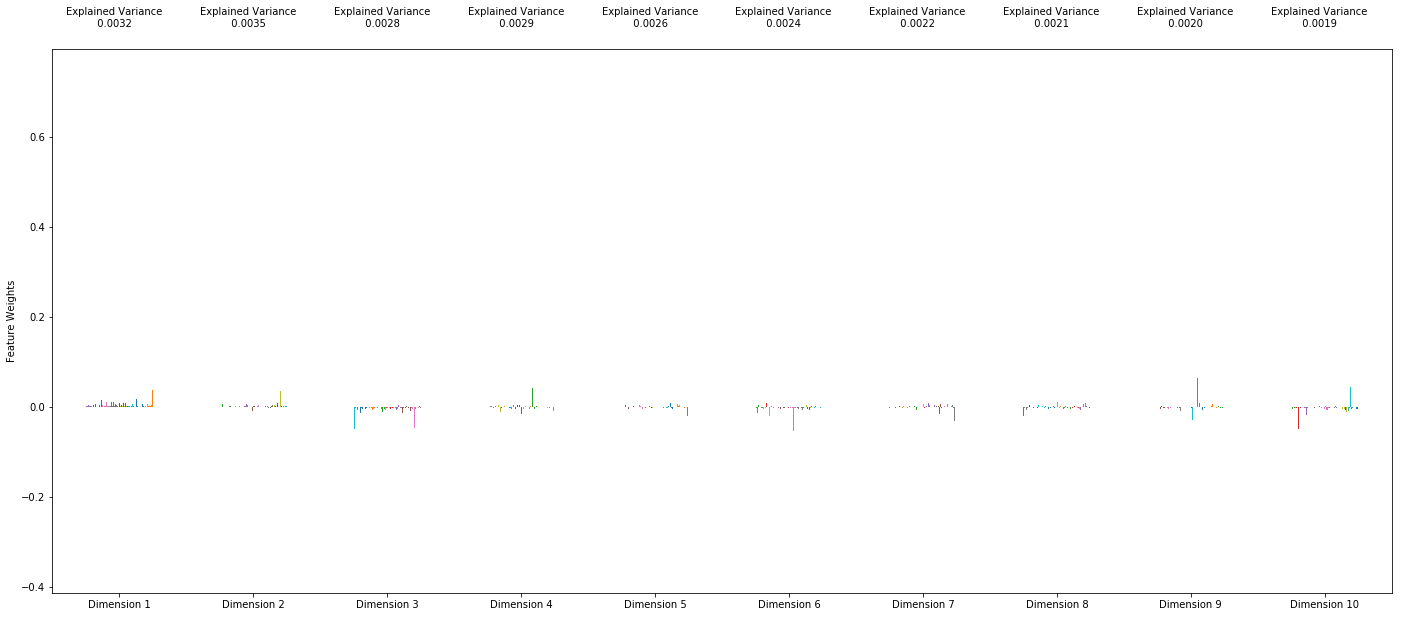

In [27]:
# THIS IS GOING TO TAKE A REALLY LONG TIME
start = datetime.now()

svd_variance(svd, tfidf_word_index)

end = datetime.now()
print(end - start)

### Explore TFIDF vectors

In [21]:
tfidf.get_feature_names()[-10:]

['édouard',
 'édouard louis',
 'édouard louis who',
 'él',
 'élisabeth',
 'élisabeth gille',
 'élisabeth gille le',
 '爱彼迎',
 '爱彼迎 aibiying',
 '爱彼迎 aibiying which']

### Do an SVD with a lot of n_components to see how many you want to assign later:

In [102]:
SVD = TruncatedSVD(300)
latent_semantic_analysis = SVD.fit_transform(X_tfidf)

(0, 0.05)

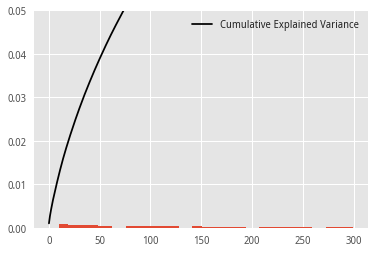

In [103]:
x = list(range(len(SVD.explained_variance_ratio_)))
plt.plot(x, np.cumsum(SVD.explained_variance_ratio_), label='Cumulative Explained Variance', color='black')
plt.bar(x, SVD.explained_variance_ratio_)
plt.legend()
plt.ylim(0,.05)

In [98]:
np.cumsum(SVD.explained_variance_ratio_)

array([ 0.00101907,  0.00273266,  0.00407299,  0.00526017,  0.00642892,
        0.00746421,  0.0084871 ,  0.00950442,  0.01049954,  0.01147103,
        0.01240875,  0.01333355,  0.01424217,  0.0151174 ,  0.015962  ,
        0.01677603,  0.01758113,  0.0183554 ,  0.01912292,  0.01987844,
        0.02061397,  0.02134232,  0.0220518 ,  0.02275903,  0.02346141,
        0.02415756,  0.02483917,  0.02551188,  0.02617342,  0.02682307,
        0.02746881,  0.02810318,  0.02872963,  0.02935495,  0.02997542,
        0.03058356,  0.03117656,  0.03176268,  0.03234479,  0.03291886,
        0.03348805,  0.03405428,  0.03461778,  0.03517304,  0.03572025,
        0.03626345,  0.03680085,  0.0373347 ,  0.03786377,  0.03838778,
        0.03890645,  0.03942252,  0.03993605,  0.04044423,  0.04095005,
        0.04144904,  0.04194647,  0.04244023,  0.0429234 ,  0.04340315,
        0.04388164,  0.04435888,  0.04482908,  0.04529398,  0.04575445,
        0.0462094 ,  0.046663  ,  0.04711405,  0.04756255,  0.04

With 100 SVD n_components, we can only account for 6% of the variance in the data. We need more. 
With 300 SVD n_components, we can only account for 11% of the variance in the data. **Go back and clean data to see if we get better?**

In [77]:
def perform_latent_semantic_analysis(n_components, vectorizer):
    SVD = TruncatedSVD(n_components)
    component_names = ["component_"+str(i+1) for i in range(n_components)]
    latent_semantic_analysis = pd.DataFrame(SVD.fit_transform(X_tfidf),
                                            index = X['cleaned_text'].index,
                                            columns = component_names)
    vocabulary_expression = pd.DataFrame(SVD.components_,
                                         index = component_names,
                                         columns = vectorizer.get_feature_names())
    return latent_semantic_analysis, vocabulary_expression

In [104]:
latent_semantic_analysis, vocabulary_expression = perform_latent_semantic_analysis(3, tfidf)

In [106]:
y_le

array([0, 0, 0, ..., 2, 2, 2])

In [107]:
latent_semantic_analysis['text'] = X['cleaned_text']
latent_semantic_analysis['class'] = y_le

In [111]:
latent_semantic_analysis.sample(10)

,component_1,component_2,component_3,text,class
11753,0.109413,0.605966,0.479684,thank you reploubarletta,0
67071,0.038621,0.011256,-0.022113,scientists have a new solution for bringing cl...,0
69253,0.069534,-0.018054,-0.003565,nordstrom is selling dirty jeans for 425 and t...,0
42809,0.049758,-0.029182,0.007163,melania trump hails empowerment of women at sa...,0
30987,0.016414,0.010983,-0.006945,rcfox4kc i ll buy shares,1
29199,0.090264,-0.007785,0.002806,seeing with your tongue and hearing with color...,0
73009,0.041539,-0.000353,-0.010161,join me for a fireside chat at mit classroom 2...,0
72965,0.039045,-0.010709,0.001030,innovation 50x in companies and government age...,0
57361,0.047467,0.088516,0.018109,nicoleperlroth nicole do you know what sam ha...,0
13640,0.062639,-0.046094,0.043386,activism ran in the family of bertrand russell...,1


In [112]:
vocabulary_expression.abs().T.sort_values('component_1', ascending=False).head(10)

,component_1,component_2,component_3
the,0.408355,0.341664,0.464118
to,0.294584,0.137377,0.361606
of,0.226701,0.212221,0.257890
is,0.200783,0.077377,0.097226
in,0.200244,0.110726,0.058515
and,0.183879,0.000980,0.056961
rt,0.180116,0.035074,0.198512
you,0.176393,0.627173,0.303188
for,0.164746,0.036250,0.002635
on,0.155539,0.042362,0.113807


In [ ]:

latent_semantic_analysis['text'] = corpus['text']
latent_semantic_analysis['book'] = corpus['book']

In [ ]:
%matplotlib inline